In [ ]:
print("hello world!")
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats.stats import pearsonr

The following is a generic plotting code

In [ ]:
def generic_plot(X, Y, xlabel, ylabel, title, filename,
                 add_correl=False, style='scatter', Y_err=None):
    if style == 'scatter':
        plot = plt.scatter(X, Y)
    elif style == 'errorbar':
        plot = plt.errorbar(X, Y, Y_err, ecolor='red', fmt='o')
    else:
        plot = plt.plot(X, Y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if add_correl:
        correl = pearsonr(X, Y)
        title += ("\nPearson R: %f\n" % correl[0])
    plt.title(title)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show() 

#### The following consists of the list of all the parties that are in the NDA, UPA and MGB coalition for 2019 Indian General Elections.

In [ ]:
NDA = ["BJP", "SHS", "ADMK", "PMK", "DMDK", "JD(U)", "LJP", "SAD","BDJS", "AGP", "AD", "BOPF", "NDPP", "RLTP","AINRC", "AJSUP", "TMC(M)", "KEC"]

UPA = ["INC", "DMK", "RJD", "NCP", "JD(S)", "BLSP", "JMM", "CPIM", "HAMS", "VSIP", "CPI","IUML", "JANADIP", "VCK", "JVM", "SWP", "BVA", "CPI(ML)(L)", "KEC(M)", "RSP", "JKN"]

MGB = ["BSP", "SP", "RLD", "LTSP", "PUNEKP", "LIP", "RMPOI","GGP"]

In [ ]:
def plot_data(party, religion,exclude=[]):
    input_file = pd.read_csv("/home/kasince2k/projects/votingData/csvdir/popPercentVsVotePercent_updated2.csv",
                             header=None)
    # PC_NAME, STATE_NM, HINDU Percentage, MUSLIM Percentage, Party Name, Vote Percentage
    parties=[]
    if type(party) is not list:
        parties.append(party)
        ylabel="Vote Percentage by " + str(party)
    else:
        parties = party
        ylabel="Vote Percentage"
    
    X=[]
    Y=[]
    names=[]
    title=""
    if religion.lower() == "hindu":
        rel=2
        xlabel="Hindu Population Percentage"
    else:
        rel=3
        xlabel="Muslim Population Percentage"
        
    for i in range(1, len(input_file[0])):
        if (input_file.iloc[i][1] in exclude):
            continue
        if(input_file.iloc[i][4] in parties):
                if input_file.iloc[i][0] in names:
                    #print("yo")
                    j = names.index(input_file.iloc[i][0])
                    if float(input_file.iloc[i][5]) > Y[j]:
                        Y[j] = float(input_file.iloc[i][5])
                    continue
                X.append(float(input_file.iloc[i][rel]))
                Y.append(float(input_file.iloc[i][5]))
                names.append(str(input_file.iloc[i][0]))
    
    generic_plot(X,Y,xlabel,ylabel,title,"",True)

In [ ]:
def plot_state(party, religion, statename):
    input_file = pd.read_csv("/home/kasince2k/projects/votingData/csvdir/popPercentVsVotePercent_updated2.csv",
                             header=None)
    # PC_NAME, STATE_NM, HINDU Percentage, MUSLIM Percentage, Party Name, Vote Percentage
    parties=[]
    if type(party) is not list:
        parties.append(party)
        ylabel="Vote Percentage by " + str(party)
    else:
        parties = party
        ylabel="Vote Percentage"
    
    X=[]
    Y=[]
    names=[]
    title=statename+" "
    
    if religion.lower() == "hindu":
        rel=2
        xlabel="Hindu Population Percentage"
    else:
        rel=3
        xlabel="Muslim Population Percentage"
    for i in range(1, len(input_file[0])):
        if (input_file.iloc[i][1] == statename.upper()):
            if(input_file.iloc[i][4] in parties):
                if input_file.iloc[i][0] in names:
                    #print("yo")
                    j = names.index(input_file.iloc[i][0])
                    if float(input_file.iloc[i][5]) > Y[j]:
                        Y[j] = float(input_file.iloc[i][5])
                    continue
                X.append(float(input_file.iloc[i][rel]))
                Y.append(float(input_file.iloc[i][5]))
                names.append(str(input_file.iloc[i][0]))
    
    generic_plot(X,Y,xlabel,ylabel,title,"",True)

In [ ]:
statenames = ['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'KARNATAKA', 'KERALA', 'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'WEST BENGAL', 'CHHATTISGARH', 'JHARKHAND', 'UTTARAKHAND', 'TELANGANA', 'ANDAMAN & NICOBAR ISLANDS', 'CHANDIGARH', 'DADRA & NAGAR HAVELI', 'DAMAN & DIU', 'NCT OF DELHI', 'LAKSHADWEEP', 'PUDUCHERRY']

In [ ]:
plot_data("BJP","hindu")

In [ ]:
plot_data(MGB,"muslim",[statenames[0], "KERALA", "TELANGANA"])

In [ ]:
plot_data(NDA,"hindu")

In [ ]:
plot_data(NDA,"hindu",[statenames[0], "KERALA", "TELANGANA"])

In [ ]:
plot_state(MGB,"muslim", "uttar pradesh")

In [ ]:
for elem in statenames:
    plot_state(NDA, "hindu", elem)

In [ ]:
plot_state(NDA, "hindu", statenames[0])

In [ ]:
plot_state("BJP", "hindu", statenames[0])

In [ ]:
plot_state("BJP", "hindu", statenames[23])

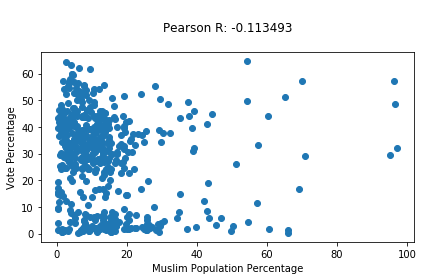

In [24]:
plot_data(UPA,"muslim")

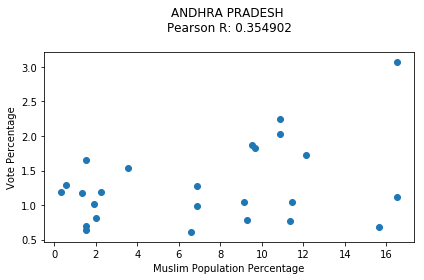

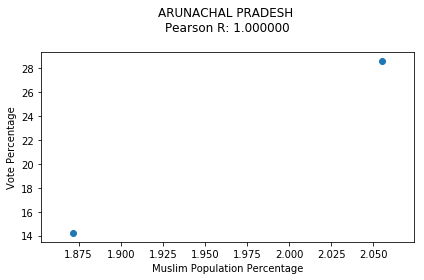

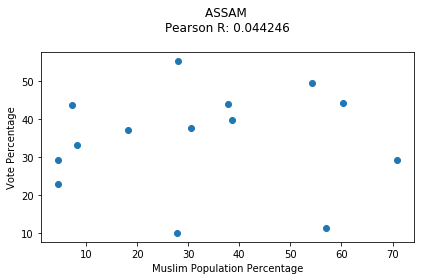

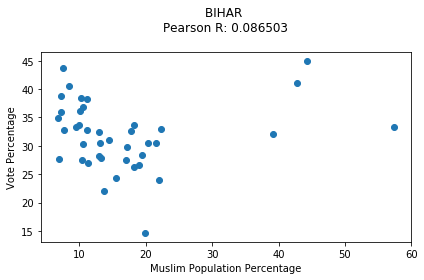

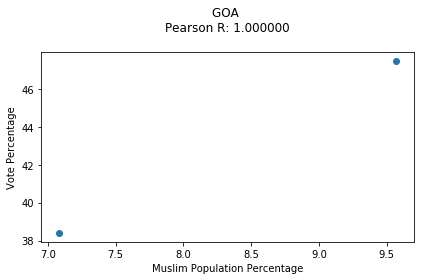

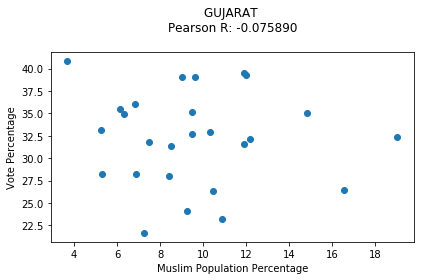

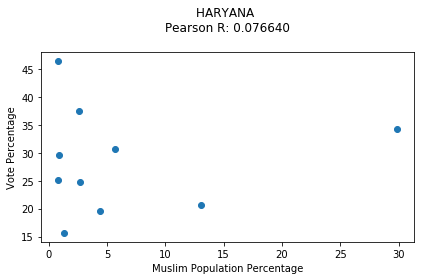

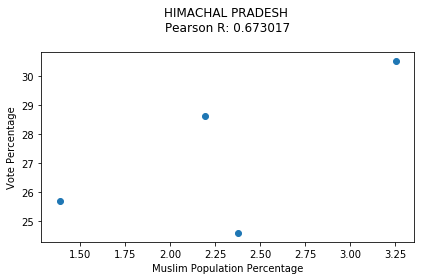

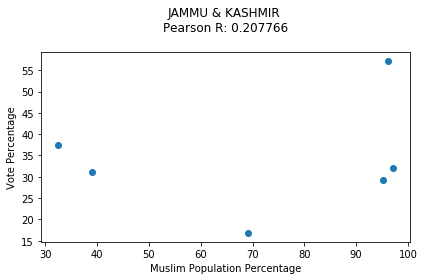

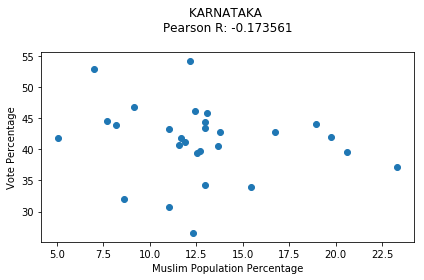

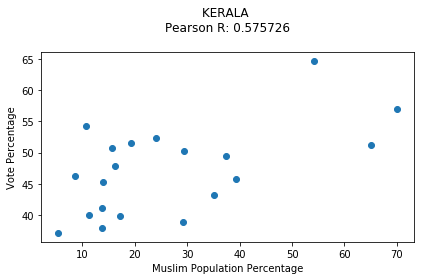

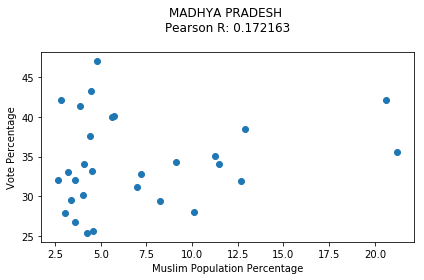

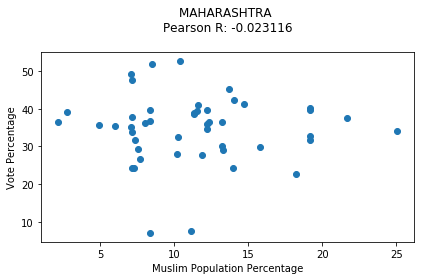

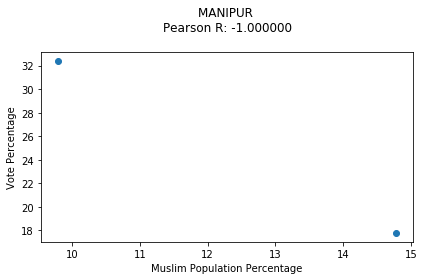

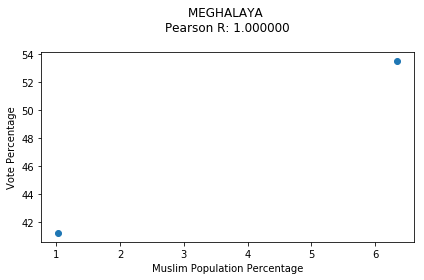

/home/kasince2k/.local/lib/python2.7/site-packages/scipy/stats/stats.py:3033: RuntimeWarning: Mean of empty slice.
  mx = x.mean()
/home/kasince2k/.local/lib/python2.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/kasince2k/.local/lib/python2.7/site-packages/scipy/stats/stats.py:3034: RuntimeWarning: Mean of empty slice.
  my = y.mean()


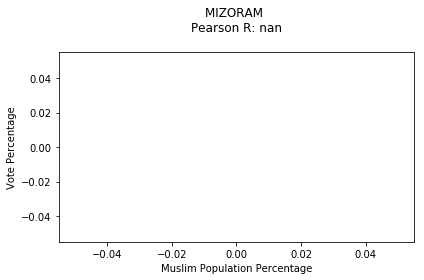

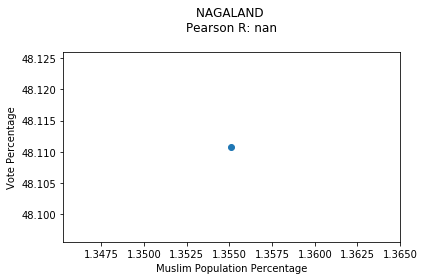

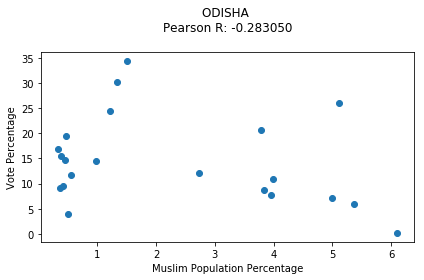

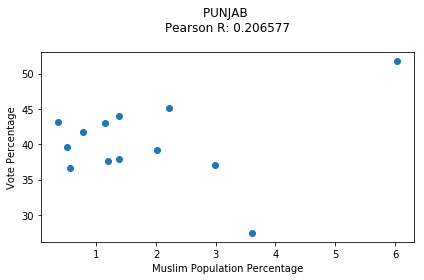

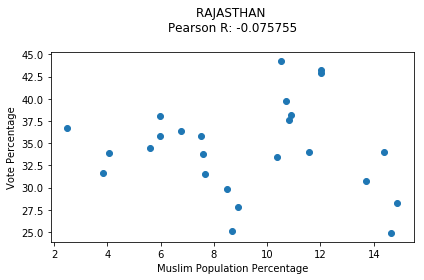

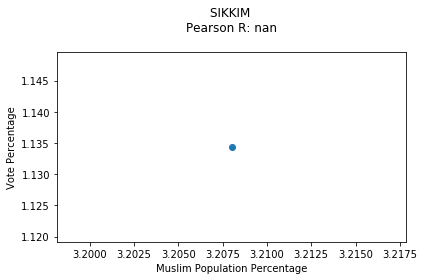

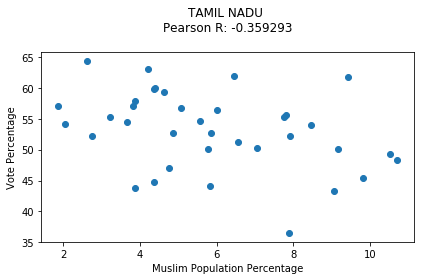

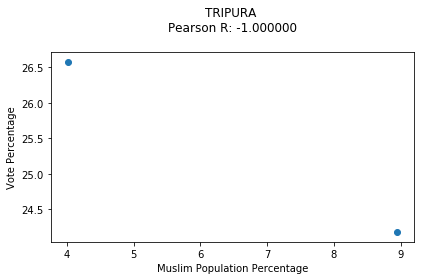

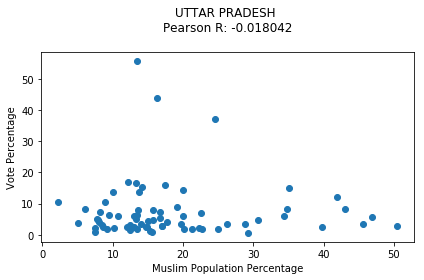

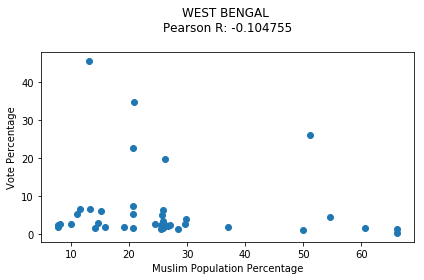

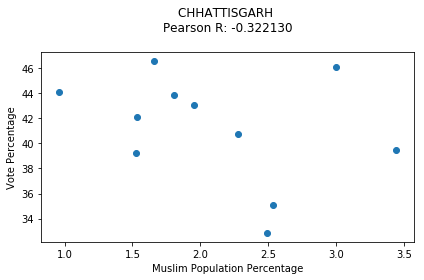

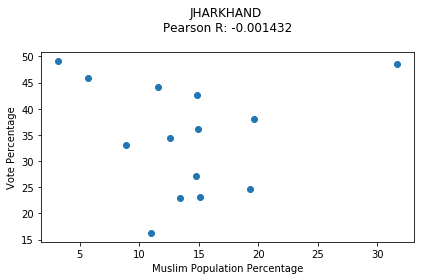

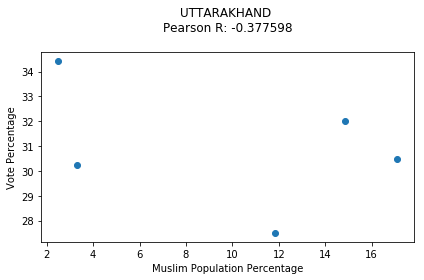

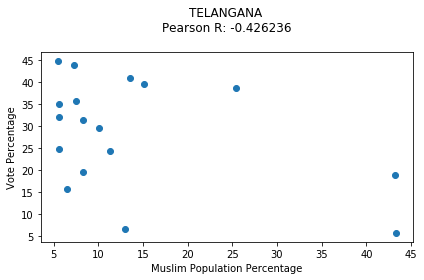

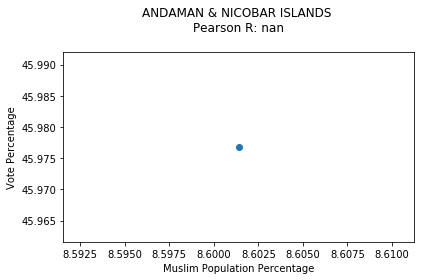

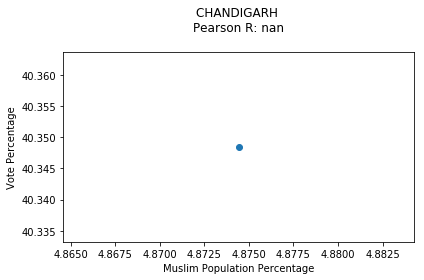

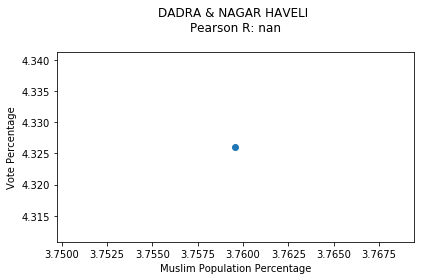

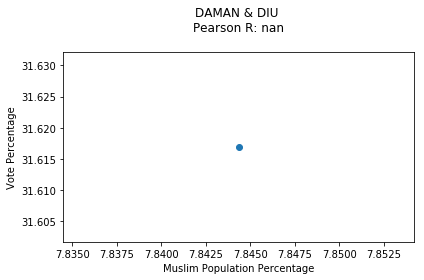

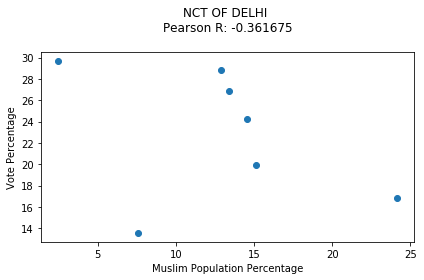

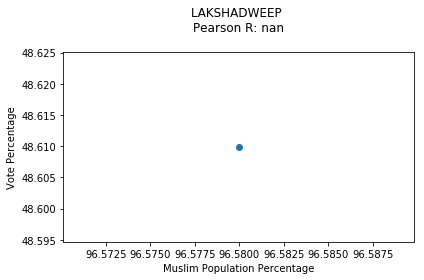

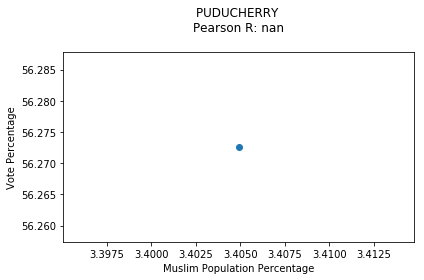

In [21]:
for elem in statenames:
    plot_state(UPA,"muslim",elem)